In [1]:
import pandas as pd
import os
os.chdir("C:\\Users\\Janvi Acharya\\Downloads")
df=pd.read_csv("Advertising.csv")

In [2]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [3]:
df=df.drop(["Unnamed: 0"],1)

In [4]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [5]:
from sklearn.preprocessing import StandardScaler

In [6]:
scaler = StandardScaler()

In [7]:
#dont normalise sales as it is dependent variable need to predict kiya to bhi chalega but still
#in MinMaxScaler it is 0-1 and standardise is 0-1
y = df["Sales"]
df = df.drop(["Sales"],1)
cols = list(df)

In [8]:
cols

['TV', 'Radio', 'Newspaper']

In [9]:
df = scaler.fit_transform(df)

In [10]:
df = pd.DataFrame(df)

In [11]:
df.columns = cols

In [12]:
df["Sales"] = y

In [13]:
df.head()

,TV,Radio,Newspaper,Sales
0,0.969852,0.981522,1.778945,22.1
1,-1.197376,1.082808,0.669579,10.4
2,-1.516155,1.528463,1.783549,9.3
3,0.052050,1.217855,1.286405,18.5
4,0.394182,-0.841614,1.281802,12.9


In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV, train_test_split as tts

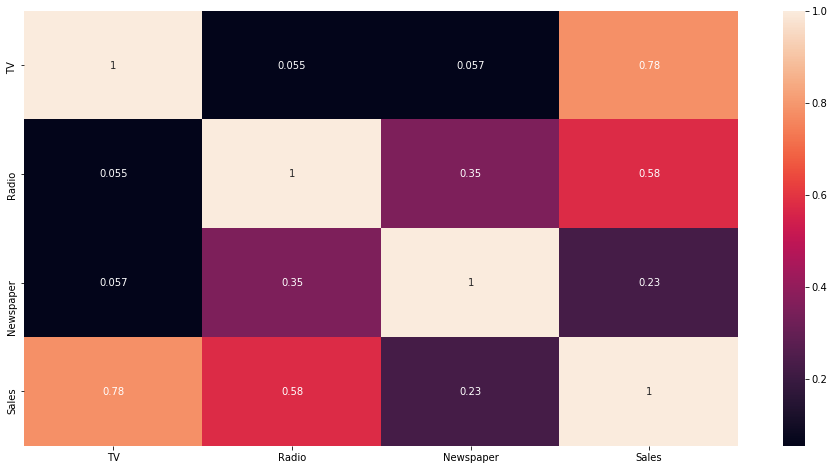

In [15]:
plt.figure(figsize=(16,8))
sns.heatmap(df.corr(),annot=True)

In [16]:
X = df.drop(["Sales"],1)
y = df["Sales"]

In [17]:
import statsmodels.api as sm

In [23]:
cols = list(X)
p_max = 1
while (len(cols)>0):
    p=[]
    X_1= X[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y,X_1).fit()
    p = list(model.pvalues.values[1:])
    p = pd.Series(p,index = cols)
    p_max = max(p)
    features_with_p_max = p.idxmax()
    if (p_max>0.05):
        cols.remove(features_with_p_max)
    else:
        break
selected_features = cols

Newspaper
Radio


In [73]:
selected_features

['TV', 'Radio']

In [75]:
from sklearn.feature_selection import RFE

In [76]:
X

,TV,Radio,Newspaper
0,0.969852,0.981522,1.778945
1,-1.197376,1.082808,0.669579
2,-1.516155,1.528463,1.783549
3,0.052050,1.217855,1.286405
4,0.394182,-0.841614,1.281802
5,-1.615408,1.731034,2.045930
6,-1.045577,0.643905,-0.324708
7,-0.313437,-0.247406,-0.872487
8,-1.616576,-1.429069,-1.360424
9,0.616043,-1.395307,-0.430582


In [78]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
#2 is features you want to take for 
features = RFE(lin_reg,2)
features.fit(X,y)

RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False),
  n_features_to_select=2, step=1, verbose=0)

In [79]:
features.ranking_

array([1, 1, 2])

In [80]:
features.support_

array([ True,  True, False])

In [81]:
cols = list(X)

In [82]:
cols = pd.Series(cols)

In [83]:
cols[features.support_]

0       TV
1    Radio
dtype: object

In [84]:
model=  lin_reg.fit(X,y)

In [85]:
ok = pd.Series(abs(model.coef_), index = cols)

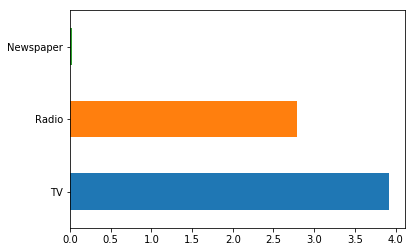

In [87]:
ok.sort_values(ascending=False).plot(kind="barh")